In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
filename = "/content/mal_top2000_anime.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",None
4,4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


In [ ]:
df.isna().sum()

Unnamed: 0          0
Name                0
Type                0
Score               0
Score Rank          0
Popularity Rank     0
Air Date            0
Studio              0
Num. of episodes    0
Genres              0
Theme(s)            0
Demographic         0
dtype: int64

# Cargando archivo del examen


In [ ]:
filename = "/content/athlete_events.csv"
df2 = pd.read_csv(filename,sep=",")
df2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df2.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Limpiando data

In [ ]:
df2.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Aquellos datos nulos de la columna Medal, se remplazan por valores 0 ya que entendemos que son aquellos que no ganaron ninguna medalla dentro del evento. 

In [ ]:
df2["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
df2["Medal"]=(df2["Medal"].fillna(0))
df2["Medal"].value_counts()

0         231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

Por temas de tiempo, borraremos todos los NaN que existen en la data.

In [ ]:
df3=df2.loc[:].dropna(how = 'any')
df3.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Se filtra la data segun tipo de medalla

In [ ]:
sin_medalla=(df3["Medal"]==0)
sin_medalla=df3[sin_medalla]
sin_medalla

gold=(df3["Medal"]=="Gold")
gold=df3[gold]
gold

Bronze=(df3["Medal"]=="Bronze")
Bronze=df3[Bronze]
Bronze

Silver=(df3["Medal"]=="Silver")
Silver=df3[Silver]
Silver

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271013,135522,"Klaas Erik ""Klaas-Erik"" Zwering",M,23.0,189.0,80.0,Netherlands,NED,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver
271015,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,25.0,200.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver
271046,135544,Krzysztof Zwoliski,M,21.0,175.0,70.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 100 metres Relay,Silver
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver


In [ ]:
G=gold.groupby(["Team"])[["Medal"]].count().sort_values("Medal",ascending=False).head(10)

In [ ]:
S=Silver.groupby(["Team"])[["Medal"]].count().sort_values("Medal",ascending=False).head(10)

In [ ]:
B=Bronze.groupby(["Team"])[["Medal"]].count().sort_values("Medal",ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


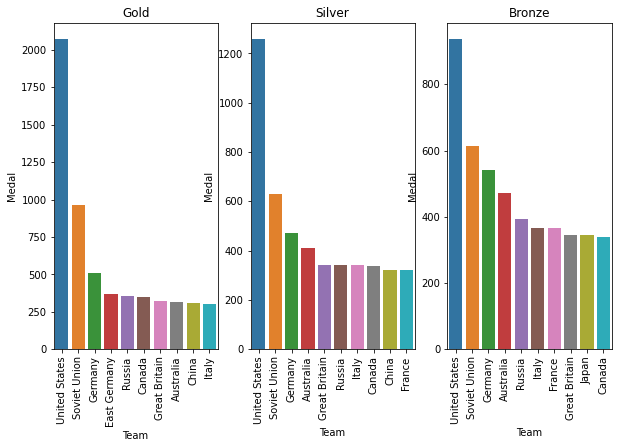

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
# Subplot 1 
plt.subplot(1, 3, 1);
sns.barplot(G.index, G["Medal"]);
plt.title('Gold', fontsize = 12);
plt.xticks(rotation = 90);

# Subplot 2
plt.subplot(1, 3, 2);
sns.barplot(S.index, S["Medal"]);
plt.title('Silver', fontsize = 12);
plt.xticks(rotation = 90);

# Subplot 3
plt.subplot(1, 3, 3);
sns.barplot(B.index, B["Medal"]);
plt.title('Bronze', fontsize = 12);
plt.xticks(rotation = 90);

Conclusiones Gráfico:

*   EEUU es el pais con mas medallas ganadas.
*   Los 10 paises que mas ganan medallas, se mantienen en las 3 categorias.





---



Filtrar basquetbolistas que hayan ganado medalla de oro

In [ ]:
basquet_gold=(gold["Sport"]=="Basketball")
basquet_gold=gold[basquet_gold]
basquet_gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
4623,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
5031,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
8165,4505,Carmelo Kyan Anthony,M,24.0,203.0,109.0,United States,USA,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold
8166,4505,Carmelo Kyan Anthony,M,28.0,203.0,109.0,United States,USA,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267416,133791,Tetiana Pavlivna Zakharova-Nadyrova,F,25.0,180.0,81.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Women's Basketball,Gold
267417,133791,Tetiana Pavlivna Zakharova-Nadyrova,F,29.0,180.0,81.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Gold
268005,134077,Nataliya Borisovna Zasulskaya,F,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
269189,134696,Alzhan Musurbekovich Zharmukhamedov,M,27.0,207.0,95.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Gold


Graficar altura promedio de basquetbolistas a lo largo de los años 

In [ ]:
prom_year=basquet_gold.groupby(["Year"])[["Height"]].mean()
prom_year

,Height
Year,
1936,188.357143
1948,191.571429
1952,193.857143
1956,193.500000
1960,196.083333
1964,196.500000
1968,196.166667
1972,199.666667
1976,190.416667


Text(1980, 199, 'Año tope')

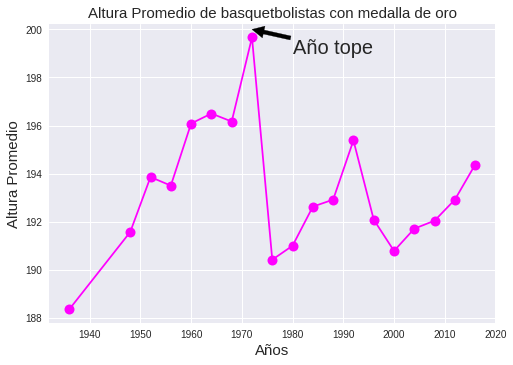

In [ ]:
plt.style.use('seaborn')
plt.plot(prom_year.index, prom_year.values,c = 'magenta', marker = '.', markersize = 20)
plt.title("Altura Promedio de basquetbolistas con medalla de oro",fontsize=15);
plt.xlabel("Años",fontsize=15);
plt.ylabel("Altura Promedio",fontsize=15);
plt.annotate("Año tope", xy=(1972,200), xytext=(1980,199), arrowprops=dict(facecolor='black'), fontsize=20)


Conculsiones Gráfico:

*   El año 1972 fue el año donde mayor altura promedio hubo en la competición.
*   En tiempos pasados, el fisico era super importante, por lo cual aquellos con mayor altura, ganaban mas medallas de oro, pero a partir del 1972 quizas hubo otros factores que influian a la hora de ganar una medalla de oro y no solo el fisico.



In [ ]:
df3["Team"].value_counts()

United States    13714
France            7807
Canada            7668
Great Britain     7499
Italy             7433
                 ...  
Rika II              1
Dylan-2              1
Clearwater           1
Angelita             1
Digby                1
Name: Team, Length: 660, dtype: int64

Graficar participacion femenina a lo largo de los años.

In [ ]:
mujeres=(df3["Sex"]=="F")
mujeres=df3[mujeres]
mujeres


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",0
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [ ]:
part_fem=mujeres.groupby(["Year"])[["Sex"]].count()
part_fem

,Sex
Year,
1920,1
1924,7
1928,56
1932,57
1936,88
1948,137
1952,417
1956,525
1960,1516


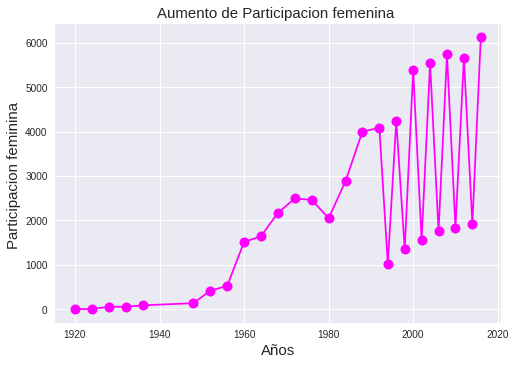

In [ ]:
plt.style.use('seaborn')
plt.plot(part_fem.index, part_fem.values,c = 'magenta', marker = '.', markersize = 20)
plt.title("Aumento de Participacion femenina ",fontsize=15);
plt.xlabel("Años",fontsize=15);
plt.ylabel("Participacion feminina ",fontsize=15);
#plt.annotate("Año tope", xy=(1972,200), xytext=(1980,199), arrowprops=dict(facecolor='black'), fontsize=20)


Conclusiones Gráfico:

* A medida que van pasando los años, la participacion de las mujeres dentro de los juegos olimpicos ha ido en aumento.




---







Agrupar top 10 por comite olimpico la cantidad de participantes

In [ ]:
noc_part= df3.groupby(["NOC"])[["Name"]].count().sort_values("Name",ascending=False).head(10)
noc_part

,Name
NOC,
USA,14214
FRA,7977
CAN,7965
GBR,7766
ITA,7697
JPN,7487
GER,7302
AUS,6619
POL,5728


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


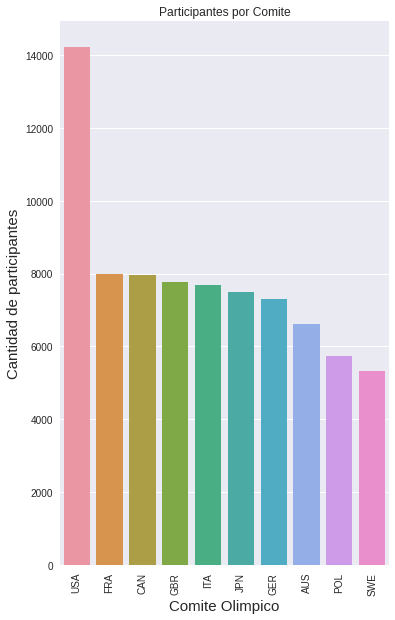

In [ ]:
plt.figure(figsize=(20,10))
# Subplot 1 
plt.subplot(1, 3, 1);
sns.barplot(noc_part.index, noc_part["Name"]);
plt.title('Participantes por Comite', fontsize = 12);
plt.xticks(rotation = 90);
plt.ylabel("Cantidad de participantes",fontsize=15);
plt.xlabel("Comite Olimpico", fontsize=15);


Conclusiones grafico: 

* USA es el comite que mas participantes lleva a los juegos olimpicos
* Se puede ver que el resto de los paises top 10 llevan una cantidad de participantes similar



---



Conclusión Final: 

* No se puede predecir mucho con los datos que se pueden extraer de la data, mas bien la unica columna que podria influir es la "Team" o "NOC" ya que se puede ver que son casi siempre los mismos paises los que mas participación y medallas tienen. 